<a href="https://colab.research.google.com/github/RamosGoat/Projects/blob/main/Aero_Bussines_Case_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/aerofit_treadmill.csv")
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
76,KP281,44,Female,16,Single,3,4,57987,75
61,KP281,34,Male,16,Single,4,5,51165,169
26,KP281,24,Female,16,Single,4,3,46617,75
106,KP481,25,Female,14,Single,2,2,45480,42
20,KP281,23,Male,14,Single,4,3,38658,113
39,KP281,26,Male,16,Partnered,4,4,44343,132
40,KP281,26,Male,16,Single,3,3,50028,85
78,KP281,47,Male,16,Partnered,4,3,56850,94
95,KP481,24,Male,14,Single,3,4,48891,106
164,KP781,28,Male,18,Single,6,5,88396,150


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

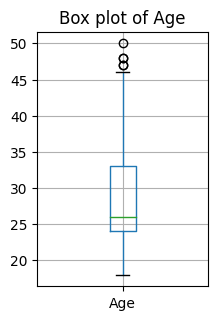

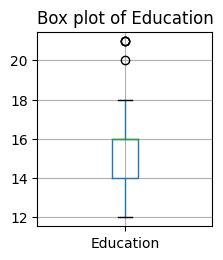

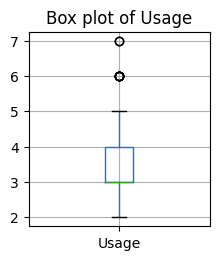

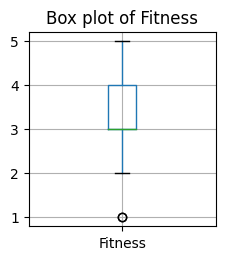

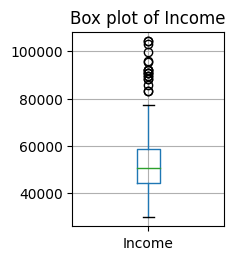

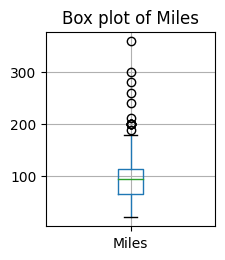

In [ ]:
continuous_vars = ['Age','Education','Usage', 'Fitness','Income','Miles']
plt.figure(figsize=(6, 6))
for i, var in enumerate(continuous_vars,1):
    plt.subplot(2, 3,i)
    df.boxplot(column=var)
    plt.title(f'Box plot of {var}')
    plt.tight_layout()
    plt.show()

In [ ]:
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [ ]:
outliers_dict = {}
for var in continuous_vars:
    outliers = find_outliers(df, var)
    outliers_dict[var] = outliers

for var, outliers in outliers_dict.items():
    print(f"Outliers for {var}:")
print(outliers)

Outliers for Age:
Outliers for Education:
Outliers for Usage:
Outliers for Fitness:
Outliers for Income:
Outliers for Miles:
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
23    KP281   24  Female         16     Partnered      5        5   44343   
84    KP481   21  Female         14     Partnered      5        4   34110   
142   KP781   22    Male         18        Single      4        5   48556   
148   KP781   24  Female         16        Single      5        5   52291   
152   KP781   25  Female         18     Partnered      5        5   61006   
155   KP781   25    Male         18     Partnered      6        5   75946   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Female         16     Partnered      6        5   90886   
170   KP781   31    Male         16     Partnered      6        5   89641   
171   KP781   33  Female         18     Partnered      4        5   95866   
173   KP781   35    Male    

In [ ]:
percentiles = {}
for var in continuous_vars:
    lower_percentile = df[var].quantile(0.05)
    upper_percentile = df[var].quantile(0.95)
    percentiles[var] = (lower_percentile, upper_percentile)

# Display the calculated percentiles
for var, (lower, upper) in percentiles.items():
    print(f"{var}: 5th percentile = {lower}, 95th percentile = {upper}")

# Clip the data based on the calculated percentiles
for var in continuous_vars:
    lower, upper = percentiles[var]
    df[var] = np.clip(df[var], lower, upper)
print(df)

Age: 5th percentile = 20.0, 95th percentile = 43.04999999999998
Education: 5th percentile = 14.0, 95th percentile = 18.0
Usage: 5th percentile = 2.0, 95th percentile = 5.049999999999983
Fitness: 5th percentile = 2.0, 95th percentile = 5.0
Income: 5th percentile = 34053.15, 95th percentile = 90948.24999999999
Miles: 5th percentile = 47.0, 95th percentile = 200.0
    Product    Age  Gender  Education MaritalStatus  Usage  Fitness    Income  \
0     KP281  20.00    Male         14        Single   3.00        4  34053.15   
1     KP281  20.00    Male         15        Single   2.00        3  34053.15   
2     KP281  20.00  Female         14     Partnered   4.00        3  34053.15   
3     KP281  20.00    Male         14        Single   3.00        3  34053.15   
4     KP281  20.00    Male         14     Partnered   4.00        2  35247.00   
..      ...    ...     ...        ...           ...    ...      ...       ...   
175   KP781  40.00    Male         18        Single   5.05        5  

In [ ]:
percentiles

{'Age': (20.0, 43.04999999999998),
 'Education': (14.0, 18.0),
 'Usage': (2.0, 5.049999999999983),
 'Fitness': (2.0, 5.0),
 'Income': (34053.15, 90948.24999999999),
 'Miles': (47.0, 200.0)}

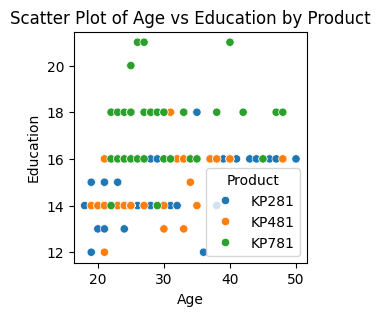

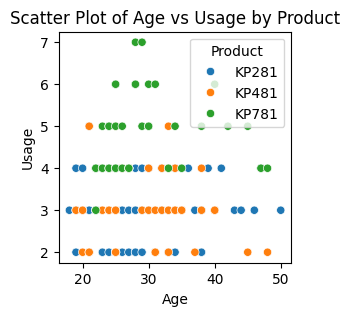

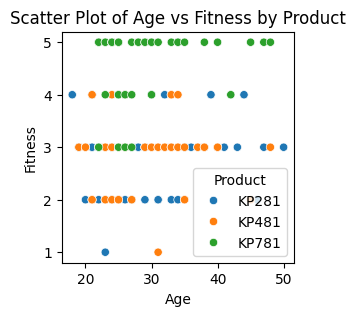

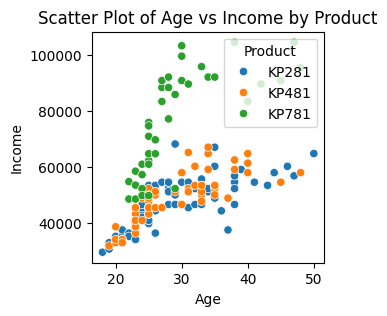

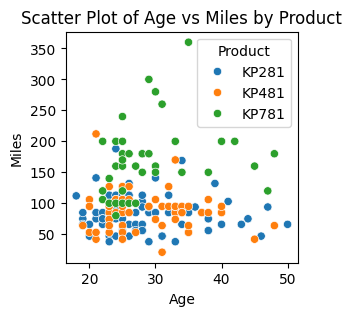

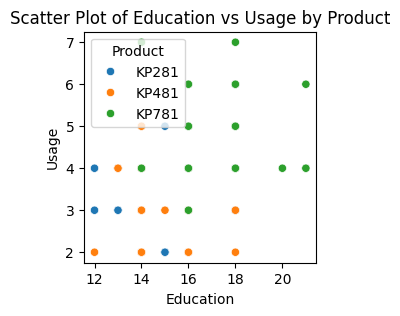

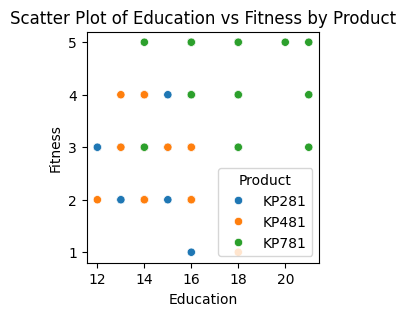

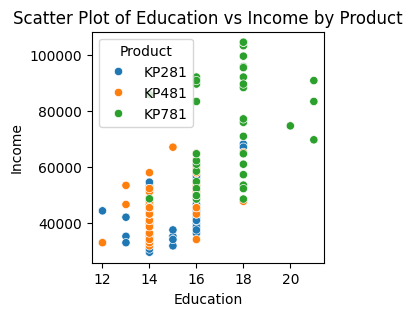

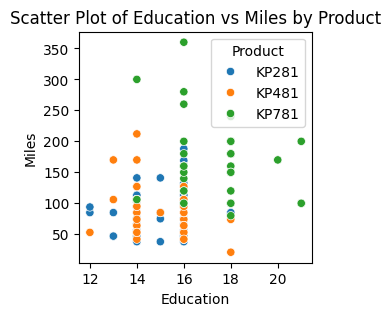

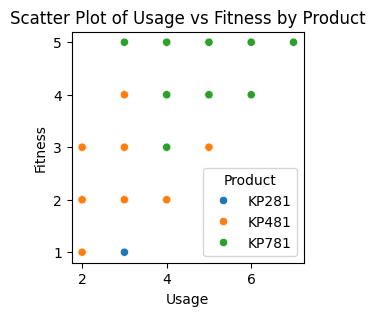

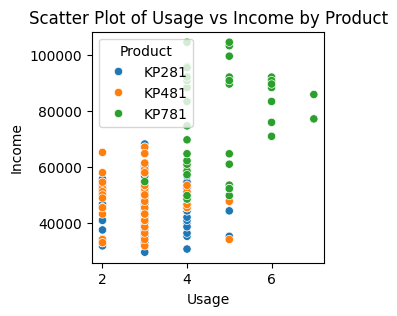

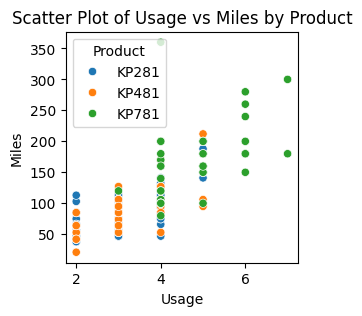

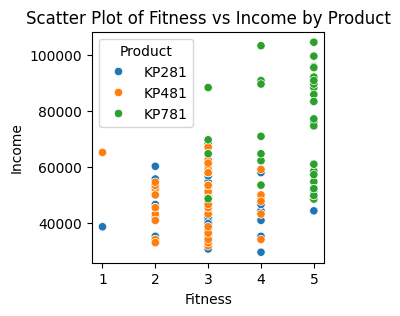

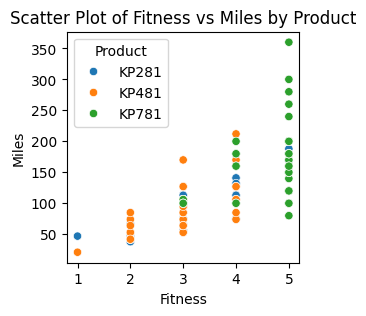

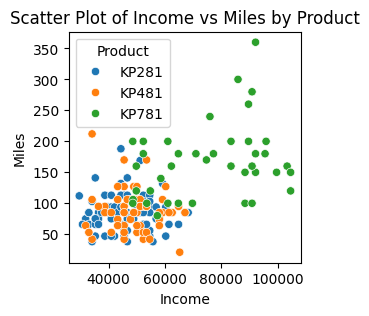

In [ ]:
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
def plot_scatterplots(df, continuous_vars, output_var):
    num_vars = len(continuous_vars)
    for i in range(num_vars):
        for j in range(i + 1, num_vars):
            plt.figure(figsize=(3, 3))
            sns.scatterplot(data=df, x=continuous_vars[i], y=continuous_vars[j], hue=output_var)
            plt.title(f'Scatter Plot of {continuous_vars[i]} vs {continuous_vars[j]} by {output_var}')
            plt.xlabel(continuous_vars[i])
            plt.ylabel(continuous_vars[j])
            plt.legend(title=output_var)
            plt.show()

# Call the function with the DataFrame, continuous variables, and the output variable
plot_scatterplots(df, continuous_vars, 'Product')

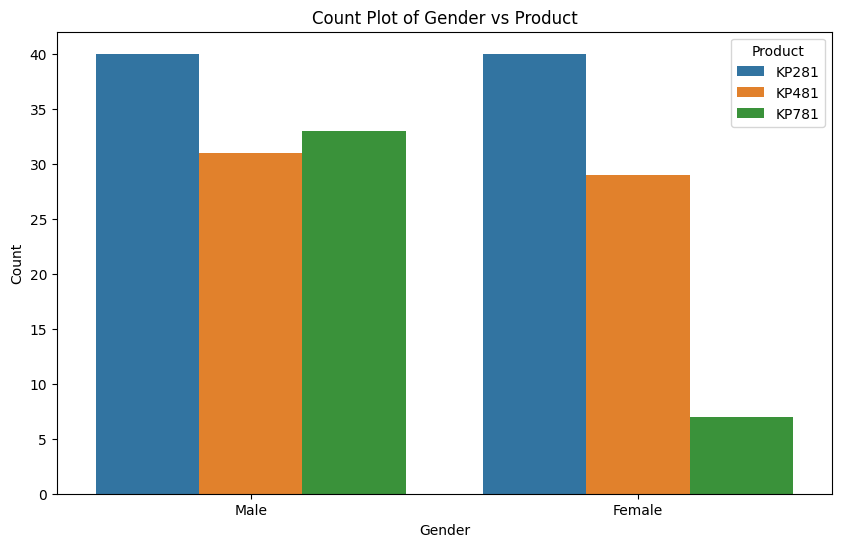

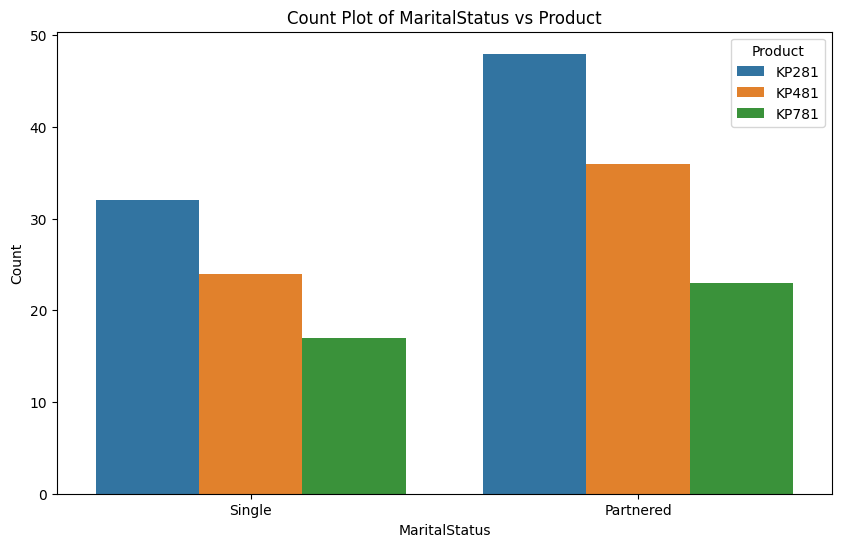

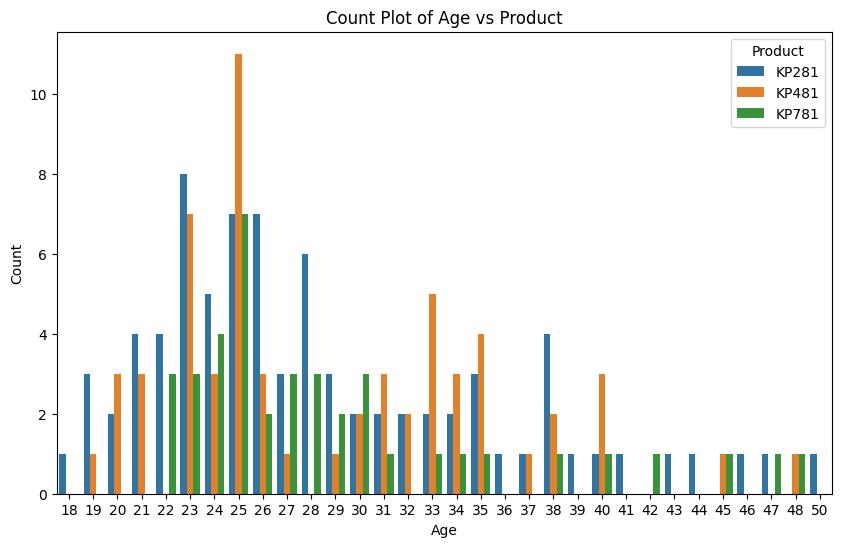

In [ ]:
categorical_vars = ['Gender', 'MaritalStatus','Age']

# Function to create count plots for each categorical variable against Product
def plot_countplots(df, categorical_vars, output_var):
    for var in categorical_vars:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=var, hue=output_var)
        plt.title(f'Count Plot of {var} vs {output_var}')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.legend(title=output_var)
        plt.show()

# Call the function with the DataFrame, categorical variables, and the output variable
plot_countplots(df, categorical_vars, 'Product')

In [ ]:
product_crosstab = pd.crosstab(index=df['Product'], columns='count')

# Calculate the total number of customers
total_customers = df['Product'].count()

# Compute the marginal probabilities (percentages) for each product
product_probabilities = (product_crosstab / total_customers) * 100
product_probabilities

col_0,count
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


In [ ]:
product_probabilities_by_gender = product_crosstab.div(product_crosstab.sum(axis=0), axis=1)

print("Probability of buying each product based on each column (gender):")
print(product_probabilities_by_gender)

Probability of buying each product based on each column (gender):
col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.00,Male,14,Single,3.00,4,34053.15,112
1,KP281,20.00,Male,15,Single,2.00,3,34053.15,75
2,KP281,20.00,Female,14,Partnered,4.00,3,34053.15,66
3,KP281,20.00,Male,14,Single,3.00,3,34053.15,85
4,KP281,20.00,Male,14,Partnered,4.00,2,35247.00,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40.00,Male,18,Single,5.05,5,83416.00,200
176,KP781,42.00,Male,18,Single,5.00,4,89641.00,200
177,KP781,43.05,Male,16,Single,5.00,5,90886.00,160
178,KP781,43.05,Male,18,Partnered,4.00,5,90948.25,120


In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Columns with non-numeric values:
                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


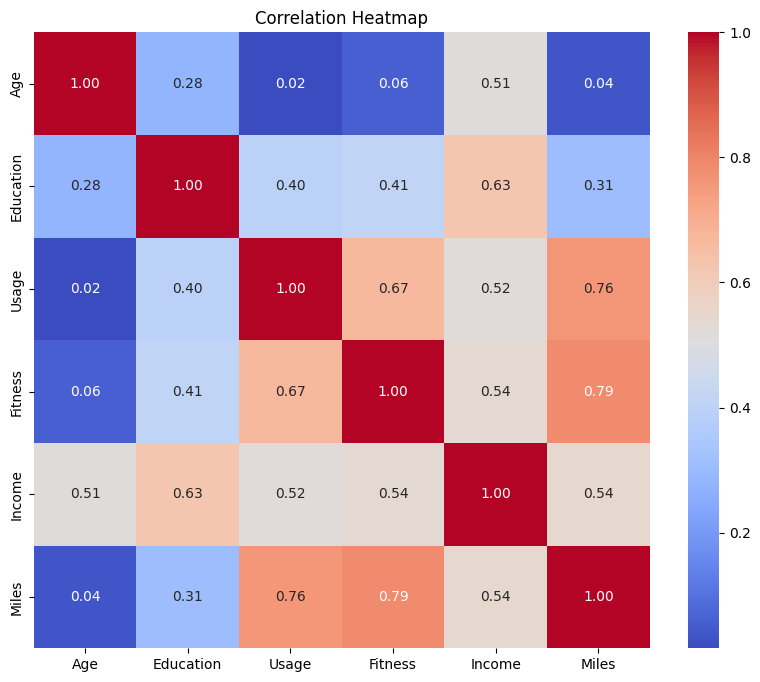

In [ ]:
Concurr = ['Age','Education','Usage','Fitness','Income','Miles']
correlation_matrix = df[Concurr].corr()
#non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Columns with non-numeric values:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

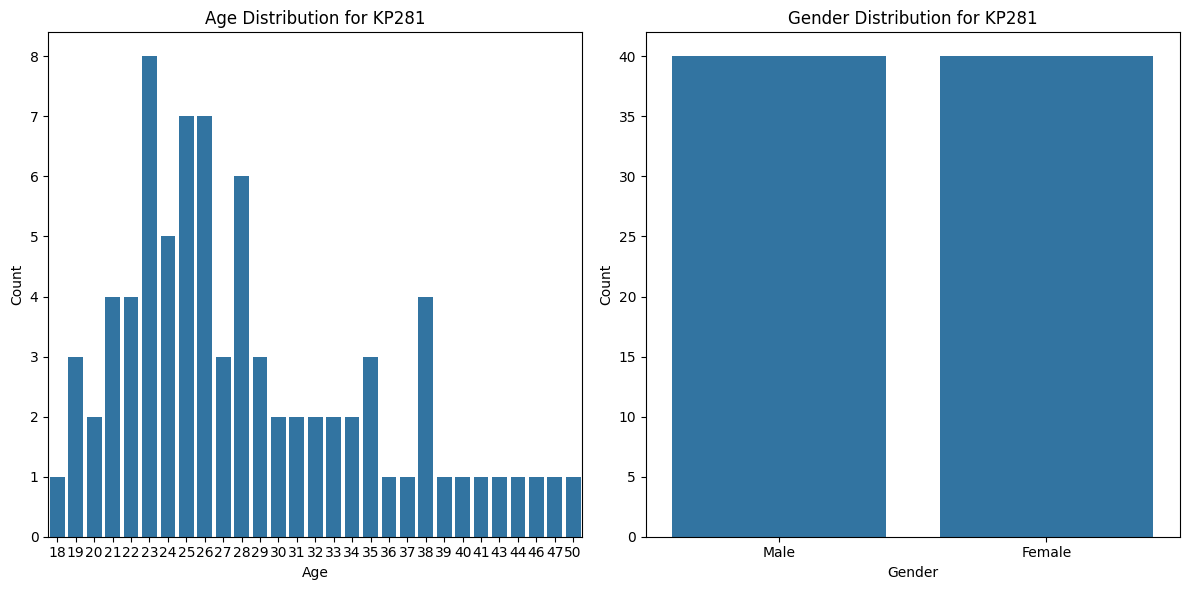

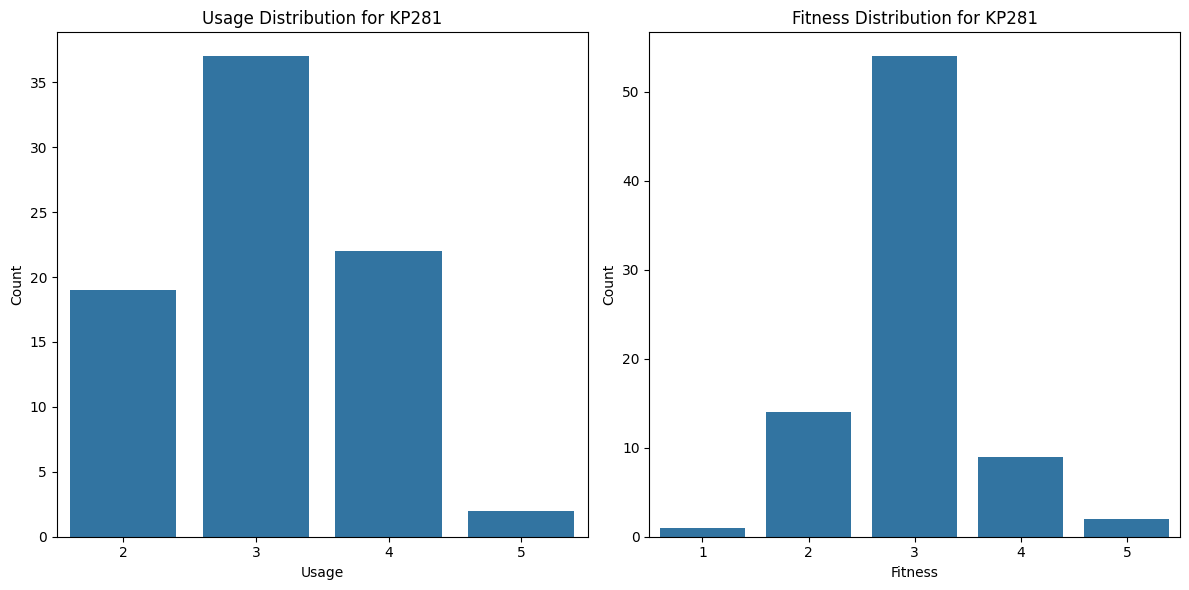

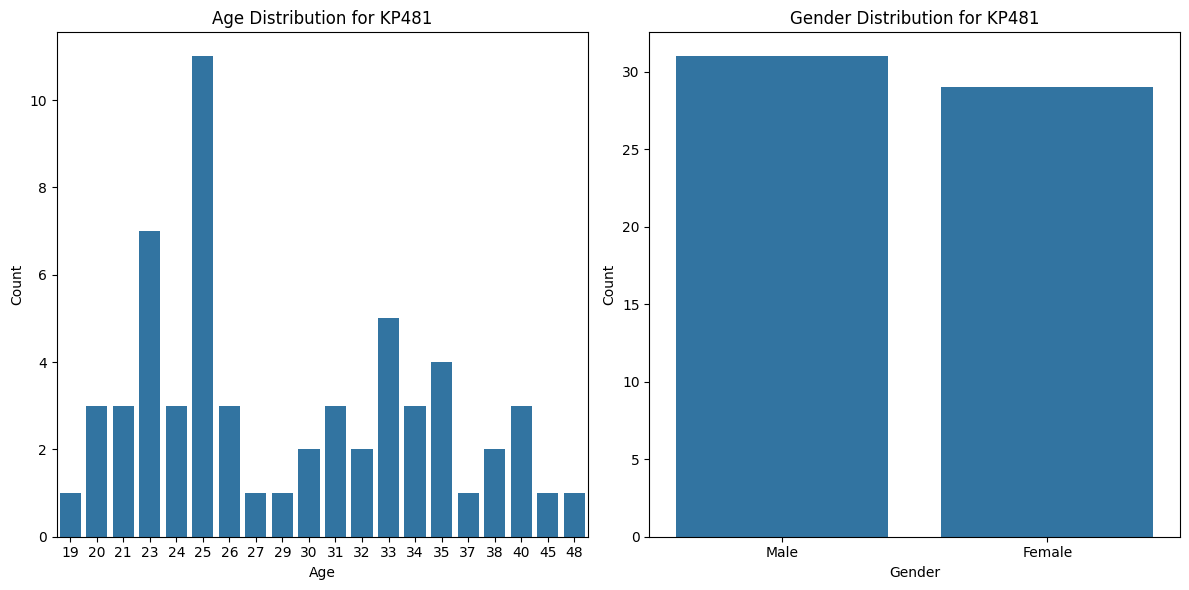

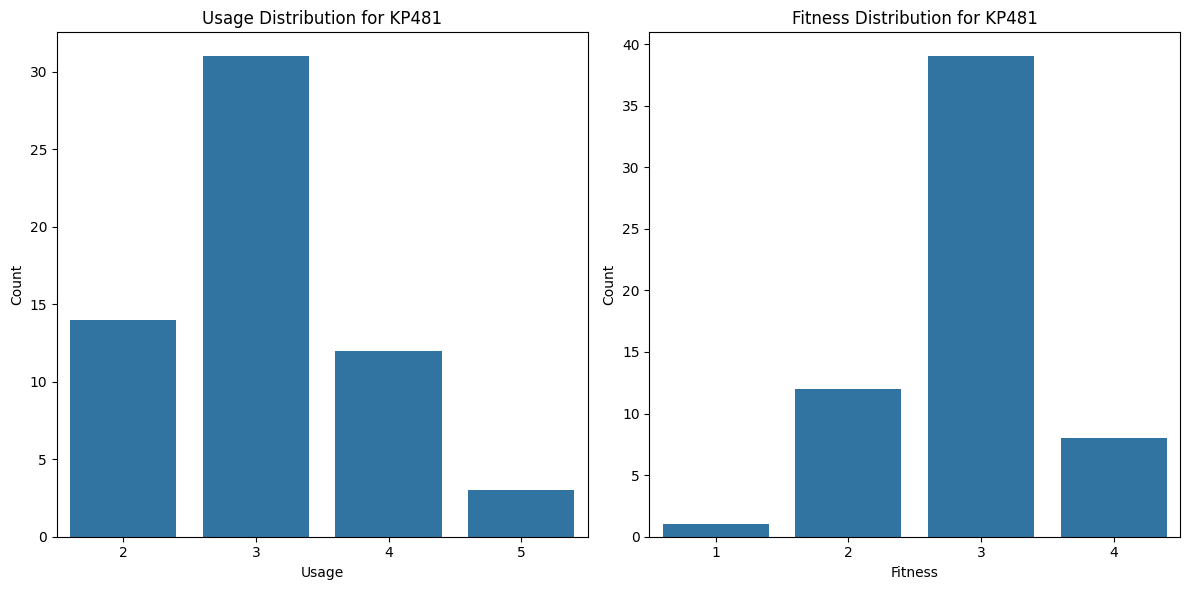

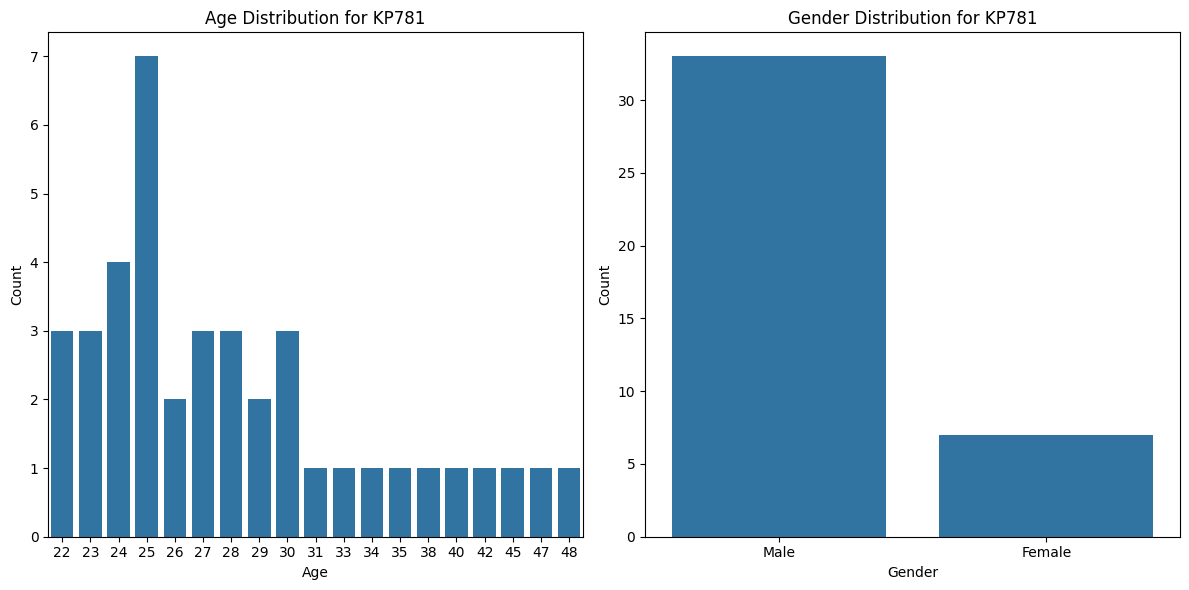

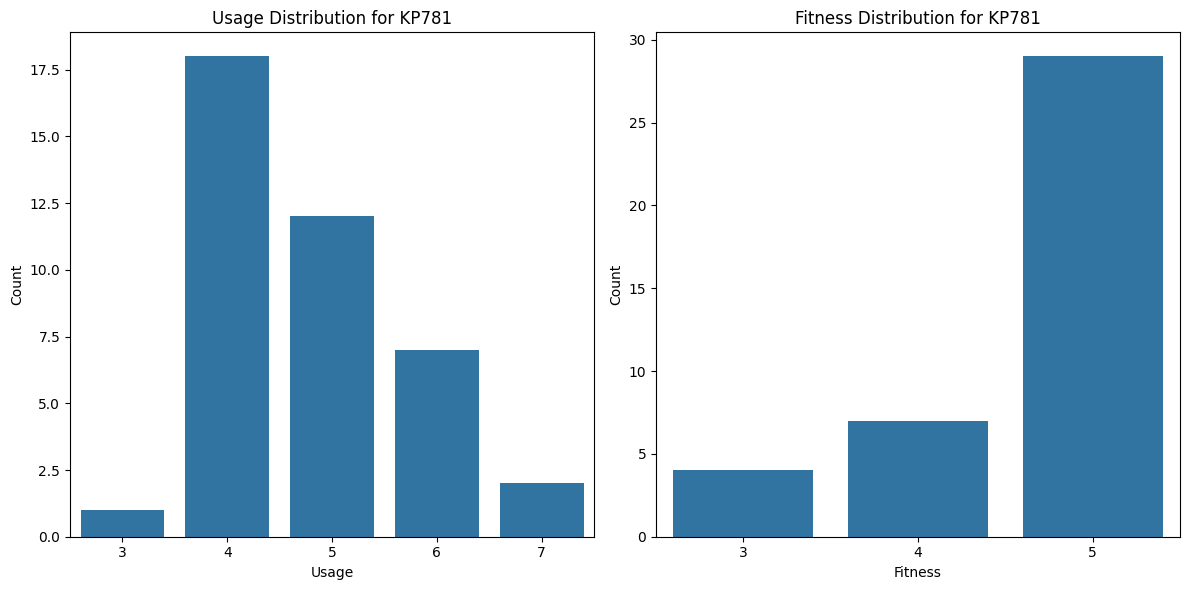

In [ ]:
products = df['Product'].unique()
for product in products:
    product_data = df[df['Product'] == product]
    # Step 2: Analyze Demographics
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(x='Age', data=product_data)
    plt.title('Age Distribution for {}'.format(product))
    plt.xlabel('Age')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.countplot(x='Gender', data=product_data)
    plt.title('Gender Distribution for {}'.format(product))
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Step 3: Analyze Behavioral Variables
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(x='Usage', data=product_data)
    plt.title('Usage Distribution for {}'.format(product))
    plt.xlabel('Usage')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.countplot(x='Fitness', data=product_data)
    plt.title('Fitness Distribution for {}'.format(product))
    plt.xlabel('Fitness')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()